In [1]:
%matplotlib inline

In [82]:
path = "data/dogscatsredux/"
#path = "data/dogscatsredux/sample/"

In [83]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [84]:
import utils; reload(utils)
from utils import plots

In [85]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [86]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [87]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 22998 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
22998/22998 [==============================] - 623s - loss: 0.1218 - acc: 0.9685 - val_loss: 0.0773 - val_acc: 0.9740


In [89]:
#save weights
vgg.model.save_weights(path+'ft1.h5')

In [90]:
#load weights
vgg = Vgg16()
vgg.model.load_weights(path+'ft1.h5')

Found 14 images belonging to 2 classes.


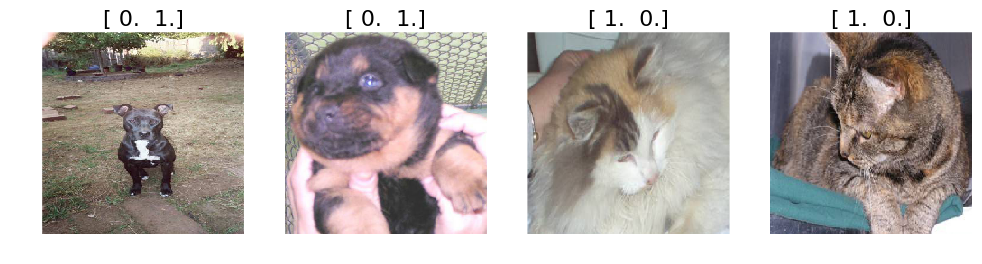

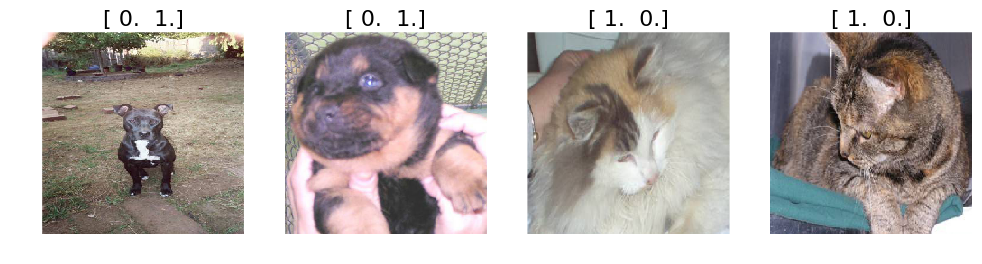

In [10]:
batches = vgg.get_batches(path+'train', batch_size=4)
imgs,labels = next(batches)
plots(imgs, titles=labels)
vgg.predict(imgs, True)
plots(imgs, titles=labels)

In [91]:
batches, predictions = vgg.test(path+'test')

Found 12499 images belonging to 1 classes.


In [93]:
# my solution with a lot of help
def format_predictions(batches, predictions):
    results = []
    #get dog predictions
    isDog = predictions[:,1]
    xs = zip(batches.filenames, isDog)
    for x in xs:
        filename = int(x[0].split('/')[1].split('.')[0])
        prediction = x[1]
        results.append((filename, prediction))
        
    results.sort(key= lambda x: x[0])
    return results

In [94]:
isDogPredictions = format_predictions(batches, predictions)

In [96]:
np.savetxt(path+"submission.csv", isDogPredictions, fmt="%i,%.5f", delimiter=",", header="id,label", comments = '')

In [97]:
from IPython.display import FileLink
FileLink(path+"submission.csv")

/home/ubuntu/courses/deeplearning1/nbs/data/dogscatsredux/submission.csv